<a href="https://colab.research.google.com/github/shankar124/googlecolab/blob/main/Sales_Data_Analysis_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sales data analysis using Pandas

https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLFCB5Dp81iNWRZu_TqtS5NPYvyfcyrD3F&index=1



Downloading the data using iternation for loop
It will save the content in content folder

Delete all the previous doanloaded file  ! rm -f Sales*.csv

In [ ]:
! rm -f Sales*

Import all modules here

In [ ]:
import pandas as pd
import calendar
import numpy as np

In [ ]:
import calendar
url = 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{}_2019.csv'

for x in range(1,13):
    month = calendar.month_name[x]
    print(calendar.month_name[x])
    ! wget 'https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv'


In [ ]:
df = pd.read_csv('Sales_April_2019.csv.1')
df.head()

**Join All CSV into ONE CSV**

In [ ]:
all_months_data = pd.DataFrame()

for x in range(1,13):
  month = calendar.month_name[x]
  df = pd.read_csv(f'Sales_{month}_2019.csv')
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv',index=False)


In [ ]:
all_data = pd.read_csv('all_data.csv')
all_data.head()
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
# all_data = pd.read_csv('all_data.csv',dtype={"Quantity Ordered":float, "Price Each":"string"})
# all_data.head()
## Receving the error because it contains string or NAN

**Cleaning The data**

Checking for Null Values

In [ ]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Checking for NaN Values

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


Removing the Null values

In [ ]:
all_data = all_data.fillna(0)

Check again for null values

In [ ]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Check for NAN values

In [ ]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


check current state of all_data data frame

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Remove string in Order Date

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Save clean csv file into diff CSV

In [ ]:
all_data.to_csv('all_data_new.csv',index=False)

In [ ]:
clean_data = pd.read_csv('all_data_new.csv',dtype={"Quantity Ordered":int, "Price Each":float})
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


**Task2: Add Month Column**

In [ ]:
clean_data['Month'] = clean_data['Order Date'].str[0:2]
clean_data['Month'] = clean_data['Month'].astype('int32')
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


**Add a sales column in data frame**

In [ ]:
clean_data['sales'] = clean_data['Quantity Ordered'] * clean_data['Price Each']
clean_data

**What was the best month for sales ? How much was earned that month**

In [ ]:
results=clean_data.groupby('Month').sum()
results = results.iloc[1:] ## remove the extra row with ZERO
results

Plot the graph for better visualization

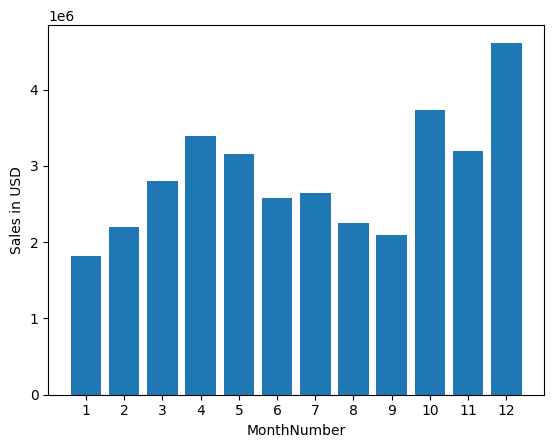

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months, results['sales'])

plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('MonthNumber')
plt.show()

**What City had highest number of Sales??**

In [ ]:
clean_data

**Filter out the City from Address column**

In [ ]:
# temp = pd.DataFrame()
temp = clean_data['Purchase Address'].str.split(',', expand = True)
clean_data['city']=temp[1]
clean_data.head()

**Another Way**

In [ ]:
# temp3 = pd.DataFrame()
# temp3 = clean_data['Purchase Address'].apply(lambda x: x.split(',')[1])

**Group by City and sum up the values**

In [ ]:
results2=clean_data.groupby('city').sum()
results2

**Plot the graph**

In [ ]:
# plt.bar(city,results2['sales'])
# # cities = results2['city'].unique()
# # print(cities)
# # plt.bar(cities, results2['sales'])

# # plt.figure().set_figwidth(25)
# # plt.show()

**Question3 : What time should we display advertisements to maximize likelihood of customer's buying product ??**

**Logic : We should aggregate quantity ordered w.r.t Order date within 24hours period**

In [ ]:
clean_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


**Convert Order Date into Date time format**

Check which dtype is Order Date

In [ ]:
clean_data.dtypes

# Its an object means String

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
sales               float64
city                 object
dtype: object

In [ ]:
clean_data['Order Date'] = pd.to_datetime(clean_data['Order Date'], errors='coerce', utc=True)

In [ ]:
clean_data.head()

Take out the hour from Order data column and put it onto different column

In [ ]:
clean_data['Hour'] = clean_data['Order Date'].dt.hour
clean_data.head()
# clean_data.dtypes

Change Hour column format to Int

Check for NAN Value

In [ ]:
nan_df1 = clean_data[clean_data.isna().any(axis=1)]
nan_df1.head()

Fill NaN value with Zero

In [ ]:
clean_data = clean_data.fillna(0)

Check again for NaN value

In [ ]:
nan_df1 = clean_data[clean_data.isna().any(axis=1)]
nan_df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour


Now Convert Float to INT

In [ ]:
clean_data['Hour'] = clean_data['Hour'].astype('int32')
clean_data.head()

Add Minute columns as well

In [ ]:
# clean_data['Minute'] = clean_data['Order Date'].dt.minute
# clean_data.head()

Draw the Plot

In [ ]:
hours = [hour for hour , df in clean_data.groupby('Hour')]

plt.plot(hours,clean_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No of Orders')
plt.grid()
plt.show()

Question 4 : What products are most often sold together ?? - Need to solve it on our OWN

Logic is look for same order ID and its products

In [ ]:
clean_data.head()

Look for duplicate row order id

In [ ]:
df = clean_data[clean_data['Order ID'].duplicated(keep=False)]
df.head(20)

To check whats the usecase of duplucated function means

In [ ]:
#
#df = clean_data[clean_data['Order ID'].duplicated()]
# df.head(20)

In [ ]:
#Add different products into same line with same order id
df ['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#drop out the duplicates from df[Grouped] column

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()


Count Unique pairs of numbers into a python disctionary
https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
  print(key,value)


**Question 5 : What product sold the most ? Why do you think it sold the most ?**

In [ ]:
clean_data.head()

In [ ]:
product_group = clean_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical',size=8)
plt.show()

Add more insights to plot like mean of prices

In [ ]:
prices = clean_data.groupby('Product').mean()['Price Each']
print(prices)

<ipython-input-65-970e34776a28>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8)


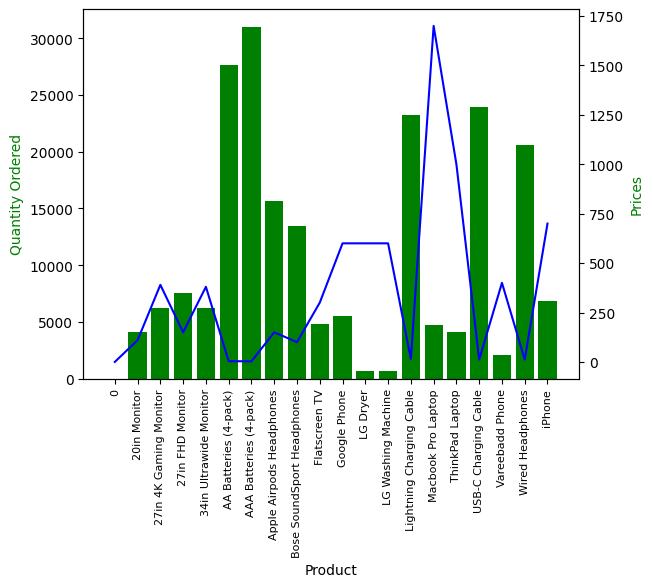

In [65]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices', color='g')
ax1.set_xticklabels(products, rotation='vertical',size=8)
plt.show()